## In this notebook, we will simply compare the loss functions over a simple network

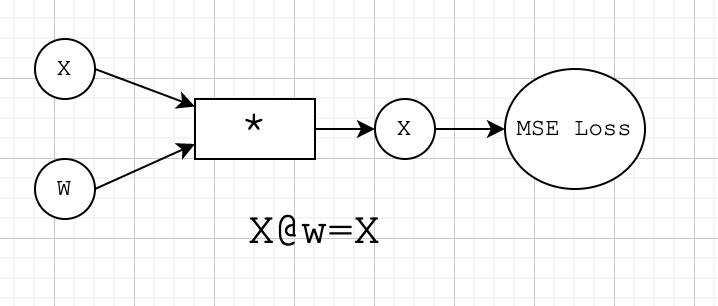

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mehdi/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
x = torch.arange(1,11,dtype=torch.float)
w = torch.rand((1),dtype=torch.float,requires_grad=True)

criterion = torch.nn.MSELoss()
y =  x.clone()

/Users/mehdi/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


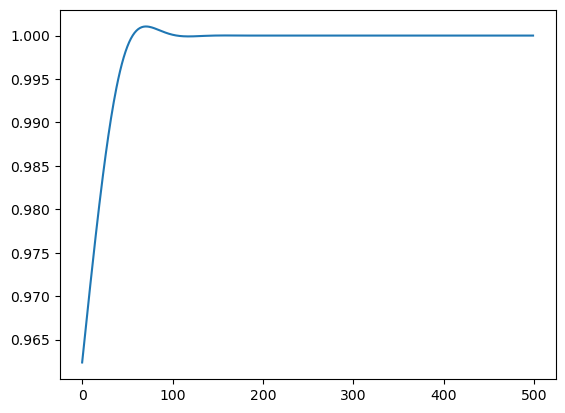

In [27]:
lst_w = []
lst_L = []
epochs = 500
wtmp = torch.tensor(w.data,dtype=torch.float,requires_grad=True)

optim1 = torch.optim.Adam([wtmp],lr=0.001)
for i in range(epochs):
    optim1.zero_grad()
    s = x*wtmp
    L = criterion(s, y)
    #print("loss: ", L)
    L.backward()
    
    
    #wtmp.data = wtmp.data - .0001*wtmp.grad
    optim1.step()
    lst_w.append(wtmp.item())
    lst_L.append(L.item())


In [28]:

dict_res["adam"] = [lst_w,lst_L]

In [29]:
dict_res.keys()

dict_keys(['manual', 'sgd', 'adam'])

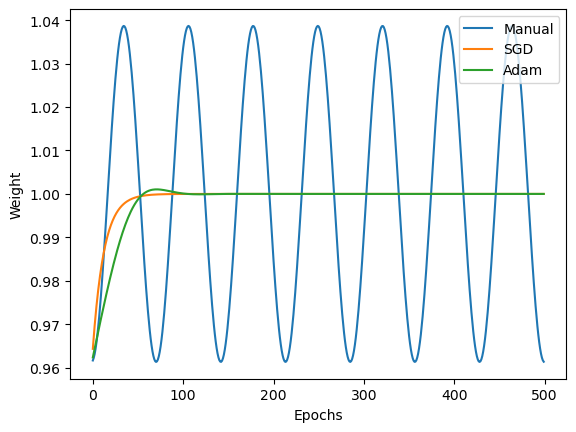

In [34]:
plt.xlabel("Epochs")
plt.ylabel("Weight")

plt.plot(range(500),dict_res["manual"][0],label="Manual")
plt.plot(range(500),dict_res["sgd"][0],label="SGD")
plt.plot(range(500),dict_res["adam"][0],label="Adam")
plt.legend()

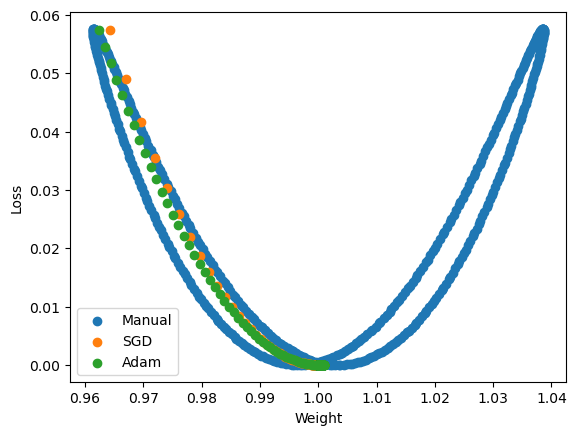

In [39]:
plt.xlabel("Weight")
plt.ylabel("Loss")

plt.scatter(dict_res["manual"][0],dict_res["manual"][1], label="Manual")
plt.scatter(dict_res["sgd"][0],dict_res["sgd"][1],label="SGD")
plt.scatter(dict_res["adam"][0],dict_res["adam"][1],label="Adam")
plt.legend()